<a href="https://colab.research.google.com/github/NityaVerma19/Startup-Dashboard/blob/master/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv('/content/startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


Deleting Remarks column

In [ ]:
df.drop(columns=['Remarks'],inplace=True)

In [ ]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


Setting a new index

In [ ]:
df.set_index('Sr No',inplace=True)

Renaming Columns

In [ ]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'

},inplace=True)

In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


Filling NaN values with 0

In [ ]:
df['amount'] = df['amount'].fillna('0')

In [ ]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [ ]:
df = df[df['amount'].str.isdigit()]

In [ ]:
df['amount'] = df['amount'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3005 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [ ]:
def to_inr(dollar):
    inr = dollar * 83.17
    return inr/10000000

Converting Dollars to Rupees

In [ ]:
df['amount'] = df['amount'].apply(to_inr)

In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1.141346e-07,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,4.593001e-09,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.047691e-08,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,1.712019e-09,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.027211e-09,2020,2


Fixing the dates

In [ ]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1.141346e-07,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,4.593001e-09,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.047691e-08,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,1.712019e-09,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.027211e-09,2020,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 1 to 2873
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2822 non-null   datetime64[ns]
 1   startup      2822 non-null   object        
 2   vertical     2822 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2822 non-null   object        
 5   investors    2822 non-null   object        
 6   round        2822 non-null   object        
 7   amount       2822 non-null   float64       
 8   year         2822 non-null   int64         
 9   month        2822 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 242.5+ KB


Removing missing values

In [ ]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2822 entries, 1 to 2873
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2822 non-null   datetime64[ns]
 1   startup      2822 non-null   object        
 2   vertical     2822 non-null   object        
 3   subvertical  2078 non-null   object        
 4   city         2822 non-null   object        
 5   investors    2822 non-null   object        
 6   round        2822 non-null   object        
 7   amount       2822 non-null   float64       
 8   year         2822 non-null   int64         
 9   month        2822 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 242.5+ KB


Downloading Cleaned Data

In [ ]:
df.to_csv('startup_cleaned.csv',index=False)

In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1.141346e-07,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,4.593001e-09,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.047691e-08,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,1.712019e-09,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.027211e-09,2020,2


Finding investors

In [ ]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

Investor Details

In [ ]:
df[df['investors'].str.contains(' IDG Ventures')].head()[['date','startup','vertical','city','round','amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,0.000246
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,0.001510
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,0.000377
505,2017-11-21,Heckyl,Technology,Mumbai,Private Equity,0.000185
528,2017-05-10,Little Black Book,Consumer Internet,New Delhi,Private Equity,0.000069


Total amount invested in a particular startup

In [ ]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Lenskart                 0.004117
CureFit                  0.001715
Bizongo                  0.001510
Curefit                  0.001029
Xpressbees               0.000858
FirstCry.com             0.000686
POPxo                    0.000590
\\xc2\\xa0CloudCherry    0.000412
Sigtuple                 0.000398
RentMojo                 0.000343
Aasaanjobs               0.000343
PlaySimple               0.000274
Tripoto                  0.000246
Active.ai                0.000206
Heckyl                   0.000185
Little Black Book        0.000069
Cloudcherry Analytics    0.000069
Name: amount, dtype: float64

Sectors invested in

<Axes: ylabel='amount'>

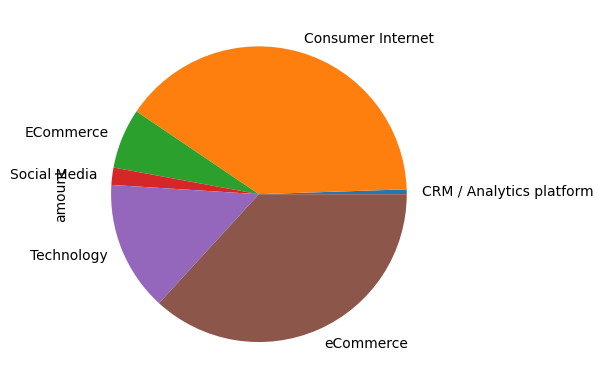

In [ ]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('vertical')['amount'].sum().plot(kind = 'pie')

Stages invested in


<Axes: ylabel='amount'>

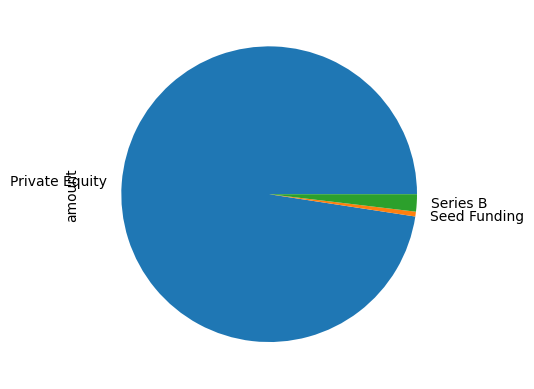

In [ ]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('round')['amount'].sum()

In [ ]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('city')['amount'].sum()

city
Bangalore    3.127288e-08
Chennai      3.994711e-09
Delhi        3.138702e-09
Mumbai       1.694899e-08
New Delhi    3.862964e-08
Pune         1.284014e-08
Singapore    1.712019e-09
Name: amount, dtype: float64

In [ ]:
df['year'] = df['date'].dt.year

In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.013723,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,0.000552,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,0.001260,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,0.000206,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,0.000124,2020,2


<Axes: xlabel='year'>

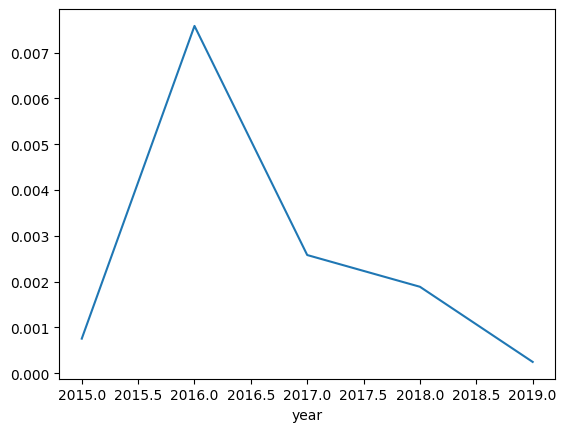

In [ ]:
df[df['investors'].str.contains(' IDG Ventures')].groupby('year')['amount'].sum().plot()

GENERAL ANALYSIS

*Amount invested in Indian startups*

In [ ]:
df['amount']

Sr No
1       0.013723
2       0.000552
3       0.001260
4       0.000206
5       0.000124
          ...   
2869    0.000240
2870    0.000000
2871    0.000027
2872    0.000034
2873    0.000549
Name: amount, Length: 2822, dtype: float64

In [ ]:
round(df['amount']).sum())

2.465922268693909

In [ ]:
df['amount'].max()*1000

267.599475

In [ ]:
df[df['amount'] == 32175]

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,


In [ ]:
df['startup'].nunique()

2299

In [ ]:
df.groupby('startup')['amount'].sum().mean()

0.0010726064674614654

In [ ]:
df['month'] = df['date'].dt.month_name()

In [ ]:
df

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1.141346e-07,2020,September
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,4.593001e-09,2020,January
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.047691e-08,2020,September
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,1.712019e-09,2020,February
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.027211e-09,2020,February
...,...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,1.997356e-09,2015,April
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000e+00,2015,April
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,2.282692e-10,2015,April


number of funding month and year wise

In [ ]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015,April,65
1,2015,August,83
2,2015,December,60
3,2015,February,14
4,2015,January,35
...,...,...,...
58,2019,September,1
59,2020,February,2
60,2020,January,2
61,2020,October,1


In [ ]:
temp_df = df.groupby(['year','month'])['amount'].sum().reset_index()

In [ ]:
##merging year and month

temp_df['x_axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str')

In [ ]:
temp_df[['amount','x_axis']]

,amount,x_axis
0,3.120412e-07,April-2015
1,4.412164e-07,August-2015
2,1.111745e-07,December-2015
3,1.084056e-07,February-2015
4,3.648598e-07,January-2015
...,...,...
58,5.706730e-10,September-2019
59,2.739231e-09,February-2020
60,9.729059e-09,January-2020
61,8.560096e-08,October-2020


In [ ]:
print("Columns before setting index:", temp_df.columns)
temp_df.drop(columns = ['year', 'month'], inplace = True)

Columns before setting index: Index(['year', 'month', 'amount', 'x_axis'], dtype='object')


In [ ]:
print("Columns before setting index:", temp_df.columns)


Columns before setting index: Index(['amount', 'x_axis'], dtype='object')


In [ ]:
temp_df.set_index('x_axis', inplace=True)
temp_df.head()

,amount
x_axis,
1-2015,0.043869
2-2015,0.013034
3-2015,0.015891
4-2015,0.037518
5-2015,0.011656


**STARTUP ANALYSIS**

In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.013723,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,0.000552,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,0.001260,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,0.000206,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,0.000124,2020,2


In [ ]:
df[df['startup'].str.contains('BYJU’S')].head()[['date','vertical','subvertical','city','round','amount']]

,date,vertical,subvertical,city,round,amount
Sr No,,,,,,
1,2020-09-01,E-Tech,E-learning,Bengaluru,Private Equity Round,0.013723


In [ ]:
df[df['startup'].str.contains('BYJU’S')].groupby('round')['amount'].sum().head(4)

round
Private Equity Round    1.141346e-07
Name: amount, dtype: float64

In [ ]:
df[df['startup'].str.contains('BYJU’S')]['investors']

Sr No
1    Tiger Global Management
Name: investors, dtype: object

In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1.141346e-07,2020,September
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,4.593001e-09,2020,January
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.047691e-08,2020,September
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,1.712019e-09,2020,February
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.027211e-09,2020,February


In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1.141346e-07,2020,September
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,4.593001e-09,2020,January
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.047691e-08,2020,September
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,1.712019e-09,2020,February
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.027211e-09,2020,February


In [ ]:
category = df.groupby('vertical')['vertical','amount'].sum().head()

<ipython-input-180-2d61e1266b36>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby('vertical')['vertical','amount'].sum().head()
<ipython-input-180-2d61e1266b36>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category = df.groupby('vertical')['vertical','amount'].sum().head()


In [ ]:
category.columns

Index(['amount'], dtype='object')

In [ ]:
category.set_index('vertical', inplace = True)

KeyError: ignored

In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1.141346e-07,2020,September
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,4.593001e-09,2020,January
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.047691e-08,2020,September
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,1.712019e-09,2020,February
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.027211e-09,2020,February


In [ ]:
si = df.groupby(['startup','investors'])['amount'].sum()
si_df = pd.DataFrame(si, columns=['amount'])


In [ ]:
si_df.head()


,,amount
startup,investors,
"""BYJU\\'S""",Qatar Investment Authority,8.560096e-08
121Policy,Xelpmoc,0.000000e+00
19th mile,"Rishi Vasudev, Excelsior Investments, Ritesh Vohra, Praveer Kumar, Prashant Gupta and Others",1.027211e-10
1Crowd,Ganesh Natarajan,0.000000e+00
1mg,HBM Healthcare Investments,0.000000e+00


In [ ]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1.141346e-07,2020,September
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,4.593001e-09,2020,January
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.047691e-08,2020,September
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,1.712019e-09,2020,February
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.027211e-09,2020,February


In [ ]:
df['amount'] * 1000000000000

Sr No
1       114134.606850
2         4593.001425
3        10476.906342
4         1712.019103
5         1027.211462
            ...      
2869      1997.355620
2870         0.000000
2871       228.269214
2872       285.336517
2873      4565.384274
Name: amount, Length: 2822, dtype: float64

In [ ]:
temp_df =

In [ ]:
top = df.groupby('startup')[['startup','amount', 'year']].sum('amount').sort_values(by = 'amount' , ascending= False).head(3)

In [ ]:
top.head()

,amount,year
startup,,
Flipkart,0.000002,10083
Rapido Bike Taxi,0.000002,2019
Paytm,0.000002,10085


In [ ]:
# Group by 'year' and 'startup', sum the 'amount' for each group, and reset the index

grouped_df = df.groupby(['year', 'startup'])['amount'].sum().reset_index()


In [ ]:
grouped_df.head()

,year,startup,amount
0,2015,1mg (Healthkartplus),3.424038e-09
1,2015,33Coupons,1.141346e-11
2,2015,6Degree,0.000000e+00
3,2015,AHA Taxis,0.000000e+00
4,2015,Abhibus,0.000000e+00


In [ ]:
grouped_df['year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
2643    2020
2644    2020
2645    2020
2646    2020
2647    2020
Name: year, Length: 2648, dtype: int64

In [ ]:
grouped_df.query('year == 2016')

,year,startup,amount
690,2016,121Policy,0.000000e+00
691,2016,1mg,8.560096e-09
692,2016,360Ride,8.560096e-11
693,2016,3Dexter,8.560096e-11
694,2016,6Degree,1.141346e-10
...,...,...,...
1616,2016,mishTag,0.000000e+00
1617,2016,numberz.in,3.709375e-10
1618,2016,underDOGS,0.000000e+00
1619,2016,vImmune,0.000000e+00


In [ ]:
sorted_df = grouped_df.sort_values(by="amount", ascending=[True, False])
sorted_df.head()

ValueError: ignored

In [ ]:
sortef_df.query(sorted_df['year'] == 2015)

NameError: ignored

In [ ]:
top_startups = grouped_df.loc[idx]
print(top_startups)

      year              startup        amount
191   2015         Flipkart.com  3.994711e-07
1387  2016             Snapdeal  1.141346e-07
1798  2017             Flipkart  2.288228e-06
2274  2018  Automation Anywhere  1.712019e-07
2612  2019     Rapido Bike Taxi  2.225625e-06
2641  2020               BYJU’S  1.141346e-07


In [278]:
grouped_df_inv = df.groupby(['year', 'investors'])['amount'].sum().reset_index()
grouped_df_inv['year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
2452    2020
2453    2020
2454    2020
2455    2020
2456    2020
Name: year, Length: 2457, dtype: int64

In [274]:
grouped_df_inv['year'] = pd.to_datetime(grouped_df_inv['year']).dt.year

In [276]:
grouped_df['year'] = pd.to_datetime(grouped_df['year'], errors='coerce')


In [281]:
grouped_df['year'].dt.year
grouped_df['year']

0      1970-01-01 00:00:00.000002015
1      1970-01-01 00:00:00.000002015
2      1970-01-01 00:00:00.000002015
3      1970-01-01 00:00:00.000002015
4      1970-01-01 00:00:00.000002015
                    ...             
2643   1970-01-01 00:00:00.000002020
2644   1970-01-01 00:00:00.000002020
2645   1970-01-01 00:00:00.000002020
2646   1970-01-01 00:00:00.000002020
2647   1970-01-01 00:00:00.000002020
Name: year, Length: 2648, dtype: datetime64[ns]

In [275]:
grouped_df_inv

,year,investors,amount
0,1970,500 Startups,0.000007
1,1970,"500 Startups, IDG Ventures & Advantedge fund, ...",0.000000
2,1970,"500 Startups, Mato Peric & Others",0.000000
3,1970,"500 Startups, Smile Multimedia, Kunal Bahl, Ro...",0.000023
4,1970,"500 Startups, TV Mohandas Pai, Tandem Capital,...",0.000044
...,...,...,...
2452,1970,Sequoia Capital India,0.001048
2453,1970,Sprout Venture Partners,0.000103
2454,1970,Susquehanna Growth Equity,0.000459
2455,1970,Tiger Global Management,0.011413


SyntaxError: ignored

In [259]:
df['amount']

Sr No
1       0.011413
2       0.000459
3       0.001048
4       0.000171
5       0.000103
          ...   
2869    0.000200
2870    0.000000
2871    0.000023
2872    0.000029
2873    0.000457
Name: amount, Length: 2822, dtype: float64